# Lab 1. PyTorch and ANNs

**Deadline**: Thursday, May 21, 11:59pm.

**Total**: 30 Points

**Late Penalty**: There is a penalty-free grace period of one hour past the deadline. Any work that is submitted between 1 hour and 24 hours past the deadline will receive a 20% grade deduction. No other late work is accepted. Quercus submission time will be used, not your local computer time. You can submit your labs as many times as you want before the deadline, so please submit often and early.

**Grading TA**: Justin Beland

This lab is partially based on an assignment developed by Prof. Jonathan Rose and Harris Chan.

This lab is a warm up to get you used to the PyTorch programming environment used
in the course, and also to help you review and renew your knowledge
of Python and relevant Python libraries.
The lab must be done individually. Please recall that the
University of Toronto plagarism rules apply.

By the end of this lab, you should be able to:

1. Be able to perform basic PyTorch tensor operations.
2. Be able to load data into PyTorch
3. Be able to configure an Artificial Neural Network (ANN) using PyTorch
4. Be able to train ANNs using PyTorch
5. Be able to evaluate different ANN configuations

You will need to use numpy and PyTorch documentations for this assignment:

* https://docs.scipy.org/doc/numpy/reference/
* https://pytorch.org/docs/stable/torch.html

You can also reference Python API documentations freely.


### What to submit

Submit a PDF file containing all your code, outputs, and write-up
from parts 1-5. You can produce a PDF of your Google Colab file by
going to **File > Print** and then save as PDF. The Colab instructions
has more information.

**Do not submit any other files produced by your code.**

Include a link to your colab file in your submission.

Please use Google Colab to complete this assignment. If you want to use Jupyter Notebook, please complete the assignment and upload your Jupyter Notebook file to Google Colab for submission. 

With Colab, you can export a PDF file using the menu option
`File -> Print` and save as PDF file.

## Colab Link

Submit make sure to include a link to your colab file here

Colab Link: https://colab.research.google.com/drive/1Ltf36vAWr3VyFCQcjXKYBYXGaVg9bBVg?usp=sharing

## Part 1. Python Basics [3 pt]

The purpose of this section is to get you used to the 
basics of Python, including working with functions, numbers,
lists, and strings.

Note that we **will** be checking your code for clarity and efficiency.

If you have trouble with this part of the assignment, please review http://cs231n.github.io/python-numpy-tutorial/

### Part (a) -- 1pt

Write a function `sum_of_cubes` that computes the sum of cubes up to `n`. If the input to `sum_of_cubes` invalid (e.g. negative or non-integer `n`), the function should print out `"Invalid input"` and return `-1`.

In [11]:
def sum_of_cubes(n):
    """Return the sum (1^3 + 2^3 + 3^3 + ... + n^3)
    
    Precondition: n > 0, type(n) == int
    
    >>> sum_of_cubes(3)
    36
    >>> sum_of_cubes(1)
    1
    """

    # Validate user input
    if not isinstance(n, int) or not (n > 0):
        print("Invalid input")
        return -1

    # Compute sum  
    sum = 0
    for i in range(1,n+1):
        sum += i**3

    return sum

# Test cases
assert(sum_of_cubes(3) == 36)
assert(sum_of_cubes(1) == 1)
assert(sum_of_cubes("Mit") == -1)
assert(sum_of_cubes(-9) == -1)

Invalid input
Invalid input


### Part (b) -- 1pt

Write a function `word_lengths` that takes a sentence (string), computes the length of each word in that sentence, and returns the length of each word in a list. You can
assume that words are always separated by a space character `" "`.

Hint: recall the `str.split` function in Python.
If you arenot sure how this function works, try
typing `help(str.split)` into a Python shell, or check out https://docs.python.org/3.6/library/stdtypes.html#str.split

In [12]:
help(str.split)

Help on method_descriptor:

split(self, /, sep=None, maxsplit=-1)
    Return a list of the words in the string, using sep as the delimiter string.
    
    sep
      The delimiter according which to split the string.
      None (the default value) means split according to any whitespace,
      and discard empty strings from the result.
    maxsplit
      Maximum number of splits to do.
      -1 (the default value) means no limit.



In [13]:
def word_lengths(sentence):
    """Return a list containing the length of each word in
    sentence.
    
    >>> word_lengths("welcome to APS360!")
    [7, 2, 7]
    >>> word_lengths("machine learning is so cool")
    [7, 8, 2, 2, 4]
    """

    # Split the input string into an array
    word_list = sentence.split(" ")

    # Iterate over the list of words, and replace each index with the length of the corresponding word
    for i in range(len(word_list)):
        word_list[i] = len(word_list[i])

    return word_list      

# Test cases
assert(word_lengths("welcome to APS360!") == [7, 2, 7])
assert(word_lengths("machine learning is so cool") == [7, 8, 2, 2, 4])

### Part (c) -- 1pt

Write a function `all_same_length` that takes a sentence (string),
and checks whether every word in the string is the same length.
You should call the function `word_lengths` in the body
of this new function.


In [14]:
def all_same_length(sentence):
    """Return True if every word in sentence has the same
    length, and False otherwise.
    
    >>> all_same_length("all same length")
    False
    >>> all_same_length("hello world")
    True
    """

    # Get list with the letter counts of each word in the sentence
    word_count = word_lengths(sentence)

    # Create a list of all the unique elements in the word_count list
    unique_ele = list(set(word_count))

    if len(unique_ele) == 1:
        return True
    else:
        return False

# Test cases
assert(all_same_length("all same length") == False)
assert(all_same_length("hello world") == True)

## Part 2. NumPy Exercises [5 pt]

In this part of the assignment, you'll be manipulating arrays 
usign NumPy. Normally, we use the shorter name `np` to represent
the package `numpy`.

In [15]:
import numpy as np

### Part (a) -- 1pt

The below variables `matrix` and `vector` are numpy arrays. Explain what you think `<NumpyArray>.size` and `<NumpyArray>.shape` represent.

In [16]:
matrix = np.array([[1., 2., 3., 0.5],
                   [4., 5., 0., 0.],
                   [-1., -2., 1., 1.]])
vector = np.array([2., 0., 1., -2.])

In [17]:
matrix.size # Total number of elements in np array (in this case a matrix)

12

In [18]:
matrix.shape # Dimensions of np array: (row, col) (in this case a matrix)

(3, 4)

In [19]:
vector.size # Total number of elements in np array 

4

In [20]:
vector.shape # Dimensions of np array: (row,) - One dimensional arrays will come in this form

(4,)

### Part (b) -- 1pt

Perform matrix multiplication `output = matrix x vector` by using
for loops to iterate through the columns and rows.
Do not use any builtin NumPy functions.
Cast your output into a NumPy array, if it isn't one already.

Hint: be mindful of the dimension of output

In [21]:
output = None # NOTE: This was already in the notebook, not sure why

In [22]:
def matrix_multiplication(m, v):
    '''
    param: m <np.array>: Matrix (nxm)
    param: v <np.array>: Vector (mx1)
    return: <np.array> : Matrix (nx1)
    NOTE: Assuming that the vector will be a nx1 vector for this excercise.
    Matrix multiplication requires doing the dot product. 
    '''

    result = list()

    def dot_product(row, col):
        '''
        param: row <arr> - Given a row represented as an arry of size n
        param: col <arr> - Given a col represented as an array of size n
        return: sum <int> - Dot product of two n sized vectors
        '''
        sum = 0

        for i in range(len(row)):
            sum += row[i]*col[i]

        return sum
    

    for i in range(len(m)):
        result.append(dot_product(m[i], v))

    return np.array(result)

output = matrix_multiplication(matrix, vector)

# Test cases
assert(output.shape == (3,)) # Output should be 3x1
assert(output.size == 3) # Output should be a single column with 3 rows

### Part (c) -- 1pt

Perform matrix multiplication `output2 = matrix x vector` by using
the function `numpy.dot`.

We will never actually write code as in
part(c), not only because `numpy.dot` is more concise and easier to read/write, but also performance-wise `numpy.dot` is much faster (it is written in C and highly optimized).
In general, we will avoid for loops in our code.

In [23]:
output2 = None

### Part (d) -- 1pt

As a way to test for consistency, show that the two outputs match.

In [24]:
output2 = np.dot(matrix, vector)

### Part (e) -- 1pt

Show that using `np.dot` is faster than using your code from part (c).

You may find the below code snippit helpful:

In [25]:
import time

# Record time for my function
a_start = time.time()
output = matrix_multiplication(matrix, vector)
a_end = time.time()
diffA = a_end - a_start

# Record time for np.dot
b_start = time.time()
output2 = np.dot(matrix, vector)
b_end = time.time()
diffB = b_end - b_start

print("For loop function execution time (s): {}".format(diffA))
print("np.dot function execution time (s): {}".format(diffB))

For loop function execution time (s): 0.0001049041748046875
np.dot function execution time (s): 0.0001583099365234375


In [26]:
#NOTE: Why is my execution time actually faster than np.dot()?

## Part 3. Images [6 pt]

A picture or image can be represented as a NumPy array of “pixels”, 
with dimensions H × W × C, where H is the height of the image, W is the width of the image,
and C is the number of colour channels. Typically we will use an image with channels that give the the Red, Green, and Blue “level” of each pixel, which is referred to with the short form RGB.

You will write Python code to load an image, and perform several array manipulations to the image and visualize their effects. 

In [27]:
import matplotlib.pyplot as plt

### Part (a) -- 1 pt

This is a photograph of a dog whose name is Mochi.

![alt text](https://drive.google.com/uc?export=view&id=1oaLVR2hr1_qzpKQ47i9rVUIklwbDcews)

Load the image from its url (https://drive.google.com/uc?export=view&id=1oaLVR2hr1_qzpKQ47i9rVUIklwbDcews) into the variable `img` using the `plt.imread` function.

Hint: You can enter the URL directly into the `plt.imread` function as a Python string.

In [28]:
img = plt.imread("https://drive.google.com/uc?export=view&id=1oaLVR2hr1_qzpKQ47i9rVUIklwbDcews")

### Part (b) -- 1pt

Use the function `plt.imshow` to visualize `img`. 

This function will also show the coordinate system used to identify pixels.
The origin is at the top left corner, and the first dimension indicates the Y (row) direction, 
and the second dimension indicates the X (column) dimension.

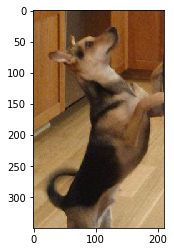

In [29]:
plt.imshow(img)

### Part (c) -- 2pt

Modify the image by adding a constant value of 0.25 to each pixel in the `img` and
store the result in the variable `img_add`. Note that, since the range for the pixels 
needs to be between [0, 1], you will also need to clip img_add to be in the range [0, 1] 
using `numpy.clip`. Clipping sets any value that is outside of the desired range to the 
closest endpoint. Display the image using `plt.imshow`.

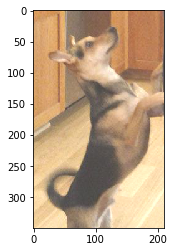

In [30]:
img_add = img + 0.25 # Add constant to all the elements
img_add = np.clip(img_add, 0, 1) # Clip all the elements

plt.imshow(img_add)

### Part (d) -- 2pt

Crop the **original** image (`img` variable) to a 130 x 150 image including Mochi's face. Discard the alpha colour channel (i.e. resulting `img_cropped` should **only have RGB channels**)

Display the image.

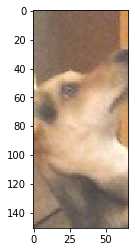

In [31]:
img_cropped = img_add[:151, 65:131, :3] # Crop and discard the alpha channel
plt.imshow(img_cropped)

## Part 4. Basics of PyTorch [6 pt]

PyTorch is a Python-based neural networks package. Along with tensorflow, PyTorch is currently one of the most popular machine learning libraries.

PyTorch, at its core, is similar to Numpy in a sense that they both 
try to make it easier to write codes for scientific computing
achieve improved performance over vanilla Python by leveraging highly optimized C back-end.
However, compare to Numpy, PyTorch offers much better GPU support and provides many high-level features for machine learning. Technically, Numpy can be used to perform almost every thing PyTorch does. However, Numpy would be a lot slower than PyTorch, especially with CUDA GPU, and it would take more effort to write machine learning related code compared to using PyTorch.

In [32]:
import torch

### Part (a) -- 1 pt

Use the function `torch.from_numpy` to convert the numpy array `img_cropped` into
a PyTorch tensor. Save the result in a variable called `img_torch`.

In [33]:
img_torch = torch.from_numpy(img_cropped)

backup = torch.from_numpy(img_cropped) # For future excercises

### Part (b) -- 1pt

Use the method `<Tensor>.shape` to find the shape (dimension and size) of `img_torch`.

In [34]:
dim = img_torch.shape

print(dim)

torch.Size([151, 66, 3])


### Part (c) -- 1pt

How many floating-point numbers are stored in the tensor `img_torch`?

In [35]:
print((torch.FloatTensor(img_torch)).numel())

29898


### Part (d) -- 1 pt

What does the code `img_torch.transpose(0,2)` do? What does the expression return? 
Is the original variable `img_torch` updated? Explain.

In [36]:
# img_torch.transpose(0,2) takes the first dimension (index 0), and the third dimension (index 2) in img_torch tensor and swaps the dimensions.
# Although documentation (https://pytorch.org/docs/master/generated/torch.transpose.html) states that the tensor would be re-written with the changes. 
# That was not the case as stated below:
print("Transformed: ")
print(img_torch.transpose(0,2), "\n") 
print("Original: ")
print(img_torch)

Transformed: 
tensor([[[0.5598, 0.5441, 0.5402,  ..., 0.4657, 0.4147, 0.3873],
         [0.5598, 0.5480, 0.5480,  ..., 0.4029, 0.3990, 0.4186],
         [0.5598, 0.5520, 0.5520,  ..., 0.3794, 0.4069, 0.4578],
         ...,
         [0.8500, 0.8461, 0.8265,  ..., 0.6029, 0.5363, 0.4696],
         [0.8578, 0.8539, 0.8422,  ..., 0.5716, 0.5088, 0.4578],
         [0.8618, 0.8657, 0.8696,  ..., 0.5480, 0.4931, 0.4539]],

        [[0.4931, 0.4775, 0.4735,  ..., 0.3912, 0.3520, 0.3363],
         [0.4971, 0.4853, 0.4853,  ..., 0.3363, 0.3363, 0.3676],
         [0.4971, 0.4892, 0.4892,  ..., 0.3088, 0.3441, 0.3951],
         ...,
         [0.6108, 0.6069, 0.5873,  ..., 0.5363, 0.4735, 0.4147],
         [0.6069, 0.6029, 0.5912,  ..., 0.5088, 0.4578, 0.4029],
         [0.6069, 0.6108, 0.6147,  ..., 0.4853, 0.4422, 0.3990]],

        [[0.4304, 0.4147, 0.4108,  ..., 0.3324, 0.2892, 0.2696],
         [0.4343, 0.4225, 0.4225,  ..., 0.2735, 0.2775, 0.3049],
         [0.4343, 0.4265, 0.4265,  ..., 0.25

### Part (e) -- 1 pt

What does the code `img_torch.unsqueeze(0)` do? What does the expression return? 
Is the original variable `img_torch` updated? Explain.

In [37]:
# Returns a new tensor with data assigned to the specified dimension
# The data is written with a dimension of size one
unsqueeze = img_torch.unsqueeze(0)
print(unsqueeze.shape)
print(img_torch.shape)
print(backup.shape)

# The original variable, img_torch wasn't updated as you can see.

torch.Size([1, 151, 66, 3])
torch.Size([151, 66, 3])
torch.Size([151, 66, 3])


### Part (f) -- 1 pt

Find the maximum value of `img_torch` along each colour channel? Your output should be a one-dimensional
PyTorch tensor with exactly three values.

Hint: lookup the function `torch.max`.

In [38]:
max1 = torch.max(img_torch[:,0])
max2 = torch.max(img_torch[:,1])
max3 = torch.max(img_torch[:,2])

max_tensor = torch.tensor([max1, max2, max3])

print("One-dimentsional PyTorch sensor containing three max value: \n {}".format(max_tensor))



One-dimentsional PyTorch sensor containing three max value: 
 tensor([1.0000, 1.0000, 0.9598])


## Part 5. Training an ANN [10 pt]

The sample code provided below is a 2-layer ANN trained on the MNIST dataset to identify digits less than 3 or greater than and equal to 3. Modify the code by changing any of the following and observe how the accuracy and error are affected:

- number of training iterations
- number of hidden units
- numbers of layers
- types of activation functions
- learning rate



In [43]:
import torch
import sys
import torch.nn as nn
import torch.nn.functional as F
from torchvision import datasets, transforms
import matplotlib.pyplot as plt # for plotting
import torch.optim as optim
import numpy as np

torch.manual_seed(1) # set the random seed

# define a 2-layer artificial neural network
class Pigeon(nn.Module):
    def __init__(self):
        super(Pigeon, self).__init__()
        self.layer1 = nn.Linear(28 * 28, 30)
        self.layer2 = nn.Linear(30, 1)
    def forward(self, img):
        flattened = img.view(-1, 28 * 28) 
        activation1 = self.layer1(flattened)
        activation1 = F.relu(activation1)
        activation2 = self.layer2(activation1)
        return activation2

## Testing different parameters

Parameters that we can adjust to manipulate training and testing data:
- Batch size: Make adjustments to weights after a certain batch has run through
- Learning rate, momentum
- Size of network: I'm going to ignore this one for now because I think changing the ANN's architecture is 
    outside the scope for this problem.
- Activation function
- Number of iterations
- Changing the optimizer perhaps (ex. Adam Optimizer)

# Part 1: Original code

In [45]:
pigeon = Pigeon()

# load the data
mnist_data = datasets.MNIST('data', train=True, download=True)
mnist_data = list(mnist_data)
mnist_train = mnist_data[:1000]
mnist_val   = mnist_data[1000:2000]
img_to_tensor = transforms.ToTensor()
      
    
# simplified training code to train `pigeon` on the "small digit recognition" task
criterion = nn.BCEWithLogitsLoss()
optimizer = optim.SGD(pigeon.parameters(), lr=0.005, momentum=0.9) 


## Part 1: Original code 

for (image, label) in mnist_train:
    # actual ground truth: is the digit less than 3?
    actual = torch.tensor(label < 3).reshape([1,1]).type(torch.FloatTensor)
    # pigeon prediction
    out = pigeon(img_to_tensor(image)) # step 1-2
    # update the parameters based on the loss
    loss = criterion(out, actual)      # step 3
    loss.backward()                    # step 4 (compute the updates for each parameter)
    optimizer.step()                   # step 4 (make the updates for each parameter)
    optimizer.zero_grad()              # a clean up step for PyTorch

# computing the error and accuracy on the training set
error = 0
for (image, label) in mnist_train:
    prob = torch.sigmoid(pigeon(img_to_tensor(image)))
    if (prob < 0.5 and label < 3) or (prob >= 0.5 and label >= 3):
        error += 1
print("Training Error Rate:", error/len(mnist_train))
print("Training Accuracy:", 1 - error/len(mnist_train))


# computing the error and accuracy on a test set
error = 0
for (image, label) in mnist_val:
    prob = torch.sigmoid(pigeon(img_to_tensor(image)))
    if (prob < 0.5 and label < 3) or (prob >= 0.5 and label >= 3):
        error += 1
print("Test Error Rate:", error/len(mnist_val))
print("Test Accuracy:", 1 - error/len(mnist_val))

Training Error Rate: 0.036
Training Accuracy: 0.964
Test Error Rate: 0.079
Test Accuracy: 0.921


# Part 2: Learning rate

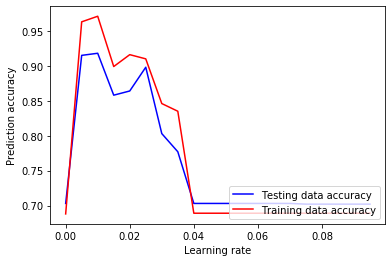

In [46]:
pigeon = Pigeon()

# load the data
mnist_data = datasets.MNIST('data', train=True, download=True)
mnist_data = list(mnist_data)
mnist_train = mnist_data[:1000]
mnist_val   = mnist_data[1000:2000]
img_to_tensor = transforms.ToTensor()  
    
# simplified training code to train `pigeon` on the "small digit recognition" task
criterion = nn.BCEWithLogitsLoss()
optimizer = optim.SGD(pigeon.parameters(), lr=0.005, momentum=0.9) 

## Part 2: Learning rate

# Test out different learning rate values
lr_increment = np.arange(0,0.1, 0.005).tolist() # Create a list of learning rate values
lr_training_val, lr_testing_val = list(), list() # Data structures to store the accuracy of our training and testing based on learning rate.

for lr in lr_increment:
    optimizer = optim.SGD(pigeon.parameters(), lr=lr, momentum=0.9) # Redefine the optimizer function with the incremented learning rate
    for (image, label) in mnist_train:
        # actual ground truth: is the digit less than 3?
        actual = torch.tensor(label < 3).reshape([1,1]).type(torch.FloatTensor)
        # pigeon prediction
        out = pigeon(img_to_tensor(image)) # step 1-2
        # update the parameters based on the loss
        loss = criterion(out, actual)      # step 3
        loss.backward()                    # step 4 (compute the updates for each parameter)
        optimizer.step()                   # step 4 (make the updates for each parameter)
        optimizer.zero_grad()              # a clean up step for PyTorch

    # computing the error and accuracy on the training set
    error = 0
    for (image, label) in mnist_train:
        prob = torch.sigmoid(pigeon(img_to_tensor(image))) 
        if (prob < 0.5 and label < 3) or (prob >= 0.5 and label >= 3):
            error += 1

    lr_training_val.append(1 - error/len(mnist_train))

    # computing the error and accuracy on a test set
    error = 0
    for (image, label) in mnist_val:
        prob = torch.sigmoid(pigeon(img_to_tensor(image)))
        if (prob < 0.5 and label < 3) or (prob >= 0.5 and label >= 3):
            error += 1

    lr_testing_val.append(1 - error/len(mnist_val))

# Plot the results of learning rate

plt.plot(lr_increment, lr_testing_val, "-b", label="Testing data accuracy")
plt.plot(lr_increment, lr_training_val, "-r", label="Training data accuracy")
plt.legend(loc="lower right")
plt.xlabel("Learning rate")
plt.ylabel("Prediction accuracy")

plt.show()


# Part 3: Momentum

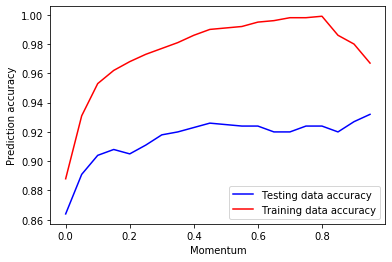

In [47]:
pigeon = Pigeon()

# load the data
mnist_data = datasets.MNIST('data', train=True, download=True)
mnist_data = list(mnist_data)
mnist_train = mnist_data[:1000]
mnist_val   = mnist_data[1000:2000]
img_to_tensor = transforms.ToTensor()  
    
# simplified training code to train `pigeon` on the "small digit recognition" task
criterion = nn.BCEWithLogitsLoss()
optimizer = optim.SGD(pigeon.parameters(), lr=0.005, momentum=0.9) 

## Part 3: Momentum

# Test out different learning rate values
momentum_increment = np.arange(0,1, 0.05).tolist() # Create a list of momentum values
momentum_training_val, momentum_testing_val = list(), list() # Data structures to store the accuracy of our training and testing based on momentum.

for momentum in momentum_increment:
    optimizer = optim.SGD(pigeon.parameters(), lr=0.005, momentum=momentum) # Redefine the optimizer function with the incremented momentum
    for (image, label) in mnist_train:
        # actual ground truth: is the digit less than 3?
        actual = torch.tensor(label < 3).reshape([1,1]).type(torch.FloatTensor)
        # pigeon prediction
        out = pigeon(img_to_tensor(image)) # step 1-2
        # update the parameters based on the loss
        loss = criterion(out, actual)      # step 3
        loss.backward()                    # step 4 (compute the updates for each parameter)
        optimizer.step()                   # step 4 (make the updates for each parameter)
        optimizer.zero_grad()              # a clean up step for PyTorch

    # computing the error and accuracy on the training set
    error = 0
    for (image, label) in mnist_train:
        prob = torch.sigmoid(pigeon(img_to_tensor(image))) 
        if (prob < 0.5 and label < 3) or (prob >= 0.5 and label >= 3):
            error += 1

    momentum_training_val.append(1 - error/len(mnist_train))

    # computing the error and accuracy on a test set
    error = 0
    for (image, label) in mnist_val:
        prob = torch.sigmoid(pigeon(img_to_tensor(image)))
        if (prob < 0.5 and label < 3) or (prob >= 0.5 and label >= 3):
            error += 1

    momentum_testing_val.append(1 - error/len(mnist_val))

# Plot the results of learning rate

plt.plot(momentum_increment, momentum_testing_val, "-b", label="Testing data accuracy")
plt.plot(momentum_increment, momentum_training_val, "-r", label="Training data accuracy")
plt.legend(loc="lower right")
plt.xlabel("Momentum")
plt.ylabel("Prediction accuracy")

plt.show()

# Part 4: Epochs

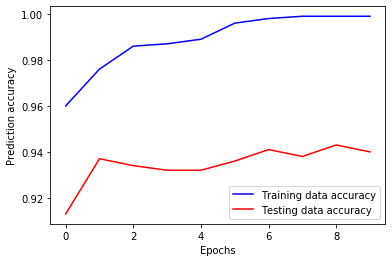

In [48]:
pigeon = Pigeon()

# load the data
mnist_data = datasets.MNIST('data', train=True, download=True)
mnist_data = list(mnist_data)
mnist_train = mnist_data[:1000]
mnist_val   = mnist_data[1000:2000]
img_to_tensor = transforms.ToTensor()  
    
# simplified training code to train `pigeon` on the "small digit recognition" task
criterion = nn.BCEWithLogitsLoss()
optimizer = optim.SGD(pigeon.parameters(), lr=0.005, momentum=0.9)

## Part 4: Epochs

#NOTE: Uncomment code block to see results of epochs.
epochs, epoch_train, epoch_val = list(), list(), list()

for epoch in range(0,10):
    epochs.append(epoch) # Keep a log of the epochs

    for (image, label) in mnist_train:
        # actual ground truth: is the digit less than 3?
        actual = torch.tensor(label < 3).reshape([1,1]).type(torch.FloatTensor)
        # pigeon prediction
        out = pigeon(img_to_tensor(image)) # step 1-2
        # update the parameters based on the loss
        loss = criterion(out, actual)      # step 3
        loss.backward()                    # step 4 (compute the updates for each parameter)
        optimizer.step()                   # step 4 (make the updates for each parameter)
        optimizer.zero_grad()              # a clean up step for PyTorch

    # computing the error and accuracy on the training set
    error = 0
    for (image, label) in mnist_train:
        prob = torch.sigmoid(pigeon(img_to_tensor(image)))
        if (prob < 0.5 and label < 3) or (prob >= 0.5 and label >= 3):
            error += 1
    epoch_train.append(1 - error/len(mnist_train))

    # computing the error and accuracy on a test set
    error = 0
    for (image, label) in mnist_val:
        prob = torch.sigmoid(pigeon(img_to_tensor(image)))
        if (prob < 0.5 and label < 3) or (prob >= 0.5 and label >= 3):
            error += 1
    epoch_val.append(1 - error/len(mnist_val))

plt.plot(epochs, epoch_train, "-b", label="Training data accuracy")
plt.plot(epochs, epoch_val, "-r", label="Testing data accuracy")
plt.legend(loc="lower right")
plt.xlabel("Epochs")
plt.ylabel("Prediction accuracy")

plt.show()

# Part 5: Adam Optimizer

In [49]:
pigeon = Pigeon()

# load the data
mnist_data = datasets.MNIST('data', train=True, download=True)
mnist_data = list(mnist_data)
mnist_train = mnist_data[:1000]
mnist_val   = mnist_data[1000:2000]
img_to_tensor = transforms.ToTensor()  
    
# simplified training code to train `pigeon` on the "small digit recognition" task
criterion = nn.BCEWithLogitsLoss()
optimizer = optim.SGD(pigeon.parameters(), lr=0.005, momentum=0.9)

## Part 5: Adam Optimizer

#NOTE: Uncomment block to get Adam optimizer results
optimizer = optim.Adam(pigeon.parameters(), lr=0.005) 

for (image, label) in mnist_train:
    # actual ground truth: is the digit less than 3?
    actual = torch.tensor(label < 3).reshape([1,1]).type(torch.FloatTensor)
    # pigeon prediction
    out = pigeon(img_to_tensor(image)) # step 1-2
    # update the parameters based on the loss
    loss = criterion(out, actual)      # step 3
    loss.backward()                    # step 4 (compute the updates for each parameter)
    optimizer.step()                   # step 4 (make the updates for each parameter)
    optimizer.zero_grad()              # a clean up step for PyTorch

# computing the error and accuracy on the training set
error = 0
for (image, label) in mnist_train:
    prob = torch.sigmoid(pigeon(img_to_tensor(image)))
    if (prob < 0.5 and label < 3) or (prob >= 0.5 and label >= 3):
        error += 1
print("Adam Training Error Rate:", error/len(mnist_train))
print("Adam Training Accuracy:", 1 - error/len(mnist_train))


# computing the error and accuracy on a test set
error = 0
for (image, label) in mnist_val:
    prob = torch.sigmoid(pigeon(img_to_tensor(image)))
    if (prob < 0.5 and label < 3) or (prob >= 0.5 and label >= 3):
        error += 1
print("Adam Test Error Rate:", error/len(mnist_val))
print("Adam Test Accuracy:", 1 - error/len(mnist_val))

Adam Training Error Rate: 0.026
Adam Training Accuracy: 0.974
Adam Test Error Rate: 0.072
Adam Test Accuracy: 0.928


### Part (a) -- 3 pt
Comment on which of the above changes resulted in the best accuracy on training data? What accuracy were you able to achieve?

The following characteristics proved to be useful to improve the accuracy of the training data:
- Learning rate between: 0.005 to 0.02
- Higher momentum value: 0.8 to 0.9
- Higher epochs

I was able to achieve a training accuracy of 99% by using the following parameters:
- Learning rate: 0.01
- Momentum: 0.9
- Epoch: 10

In [40]:
import torch
import sys
import torch.nn as nn
import torch.nn.functional as F
from torchvision import datasets, transforms
import matplotlib.pyplot as plt # for plotting
import torch.optim as optim
import numpy as np

torch.manual_seed(1) # set the random seed

# define a 2-layer artificial neural network
class Pigeon(nn.Module):
    def __init__(self):
        super(Pigeon, self).__init__()
        self.layer1 = nn.Linear(28 * 28, 30)
        self.layer2 = nn.Linear(30, 1)
    def forward(self, img):
        flattened = img.view(-1, 28 * 28) 
        activation1 = self.layer1(flattened)
        activation1 = F.relu(activation1)
        activation2 = self.layer2(activation1)
        return activation2

pigeon = Pigeon()

# load the data
mnist_data = datasets.MNIST('data', train=True, download=True)
mnist_data = list(mnist_data)
mnist_train = mnist_data[:1000]
mnist_val   = mnist_data[1000:2000]
img_to_tensor = transforms.ToTensor()
      
    
# simplified training code to train `pigeon` on the "small digit recognition" task
criterion = nn.BCEWithLogitsLoss()
optimizer = optim.SGD(pigeon.parameters(), lr=0.01, momentum=0.9) 

for epoch in range(0,10):

    for (image, label) in mnist_train:
        # actual ground truth: is the digit less than 3?
        actual = torch.tensor(label < 3).reshape([1,1]).type(torch.FloatTensor)
        # pigeon prediction
        out = pigeon(img_to_tensor(image)) # step 1-2
        # update the parameters based on the loss
        loss = criterion(out, actual)      # step 3
        loss.backward()                    # step 4 (compute the updates for each parameter)
        optimizer.step()                   # step 4 (make the updates for each parameter)
        optimizer.zero_grad()              # a clean up step for PyTorch
        
# computing the error and accuracy on the training set
error = 0
for (image, label) in mnist_train:
    prob = torch.sigmoid(pigeon(img_to_tensor(image)))
    if (prob < 0.5 and label < 3) or (prob >= 0.5 and label >= 3):
        error += 1
print("Training Error Rate:", error/len(mnist_train))
print("Training Accuracy:", 1 - error/len(mnist_train))


# computing the error and accuracy on a test set
error = 0
for (image, label) in mnist_val:
    prob = torch.sigmoid(pigeon(img_to_tensor(image)))
    if (prob < 0.5 and label < 3) or (prob >= 0.5 and label >= 3):
        error += 1
print("Test Error Rate:", error/len(mnist_val))
print("Test Accuracy:", 1 - error/len(mnist_val))


Training Error Rate: 0.001
Training Accuracy: 0.999
Test Error Rate: 0.055
Test Accuracy: 0.945


### Part (b) -- 3 pt


Comment on which of the above changes resulted in the best accuracy on testing data? What accuracy were you able to achieve?

By using the Adam optimizer with a learning rate of 0.005, I was able to achieve a testing set accuracy of ~94%.

In [41]:
import torch
import sys
import torch.nn as nn
import torch.nn.functional as F
from torchvision import datasets, transforms
import matplotlib.pyplot as plt # for plotting
import torch.optim as optim
import numpy as np

torch.manual_seed(1) # set the random seed

# define a 2-layer artificial neural network
class Pigeon(nn.Module):
    def __init__(self):
        super(Pigeon, self).__init__()
        self.layer1 = nn.Linear(28 * 28, 30)
        self.layer2 = nn.Linear(30, 1)
    def forward(self, img):
        flattened = img.view(-1, 28 * 28) 
        activation1 = self.layer1(flattened)
        activation1 = F.relu(activation1)
        activation2 = self.layer2(activation1)
        return activation2

pigeon = Pigeon()

# load the data
mnist_data = datasets.MNIST('data', train=True, download=True)
mnist_data = list(mnist_data)
mnist_train = mnist_data[:1000]
mnist_val   = mnist_data[1000:2000]
img_to_tensor = transforms.ToTensor()
      
    
# simplified training code to train `pigeon` on the "small digit recognition" task
criterion = nn.BCEWithLogitsLoss()
optimizer = optim.Adam(pigeon.parameters(), lr=0.005) 

for (image, label) in mnist_train:
    # actual ground truth: is the digit less than 3?
    actual = torch.tensor(label < 3).reshape([1,1]).type(torch.FloatTensor)
    # pigeon prediction
    out = pigeon(img_to_tensor(image)) # step 1-2
    # update the parameters based on the loss
    loss = criterion(out, actual)      # step 3
    loss.backward()                    # step 4 (compute the updates for each parameter)
    optimizer.step()                   # step 4 (make the updates for each parameter)
    optimizer.zero_grad()              # a clean up step for PyTorch
        
# computing the error and accuracy on the training set
error = 0
for (image, label) in mnist_train:
    prob = torch.sigmoid(pigeon(img_to_tensor(image)))
    if (prob < 0.5 and label < 3) or (prob >= 0.5 and label >= 3):
        error += 1
print("Training Error Rate:", error/len(mnist_train))
print("Training Accuracy:", 1 - error/len(mnist_train))


# computing the error and accuracy on a test set
error = 0
for (image, label) in mnist_val:
    prob = torch.sigmoid(pigeon(img_to_tensor(image)))
    if (prob < 0.5 and label < 3) or (prob >= 0.5 and label >= 3):
        error += 1
print("Test Error Rate:", error/len(mnist_val))
print("Test Accuracy:", 1 - error/len(mnist_val))

Training Error Rate: 0.02
Training Accuracy: 0.98
Test Error Rate: 0.064
Test Accuracy: 0.9359999999999999


### Part (c) -- 4 pt
Which model hyperparameters should you use, the ones from (a) or (b)?

It is best to use the hyperparameters of option B. It is evident that option A is experiencing over-fitting due to the large number of epochs.